***Classificação de Texto usando Processamento de Linguagem Natural (PLN)***

Este projeto é um exemplo de uso de técnicas de Processamento de Linguagem Natural (PLN) para a classificação de textos

*   pandas
*   scikit-learn
*   nltk para pré-processamento, vetorização e modelagem dos dados.

1.   [Marcello Lassalla](https://www.linkedin.com/in/marcello-lassalla-a146b8225/)








# Importação das bibliotecas



In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import plotly.graph_objs as go
import plotly.io as pio
import re
import spacy
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer
import nltk

import tensorflow as tf
from scipy.sparse import csr_matrix
import seaborn as sns
from collections import Counter

from nltk.stem import WordNetLemmatizer
from wordcloud import WordCloud
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import accuracy_score

import requests

In [ ]:
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [ ]:
# Definir a semente aleatória para reprodutibilidade
np.random.seed(42)
tf.random.set_seed(42)

# Carregar os dados dos relatórios


In [ ]:
# dadosFilaUnidade = pd.read_excel('/content/Relatório - Fila Unidade ASA.xlsx')
# dadosAgentes = pd.read_excel('/content/Relatório de Agente - ASA.xlsx')
# Cesta = pd.read_csv('/content/Cesta de Serviços.csv')
Conversas = pd.read_csv('/content/Live.csv')

In [ ]:
# dadosAgentes.head()

In [ ]:
# dadosFilaUnidade.head()

In [ ]:
Conversas.head()

,conversationId,brandId,startTimeL,startTime,startTimeUTC,startTimeLOCAL,startTimeDate,startTimeYear,startTimeMonth,startTimeMonthStr,...,surveyDialogIdPostSurvey,surveyQuestionPostSurvey,surveyAnswerPostSurvey,surveyQuestionIdPostSurvey,surveyAnswerIdPostSurvey,surveyQuestionTypePostSurvey,surveyQuestionFormatPostSurvey,transcriptAll,transcriptAgent,transcriptConsumer
0,40323068-dd54-44c7-a1d9-152b3195ee26,66136143,1719931589139,2024-07-02 14:46:29,2024-07-02 14:46:29,2024-07-02 11:46:29,02-Jul-24,2024,7,July,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11:46:29-consumer: Olá\n11:46:30-agent: Digite...,'Digite o número correspondente à opção deseja...,'Olá'\n'3'\n'1'\n'2'\n'2'\n'23024953'\n'Eu vou...
1,7348ba6e-4d6a-4de5-8605-8ed83cdf3cfa,66136143,1719931288972,2024-07-02 14:41:28,2024-07-02 14:41:28,2024-07-02 11:41:28,02-Jul-24,2024,7,July,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11:41:29-consumer: Oi\n11:41:30-agent: Digite ...,'Digite o número correspondente à opção deseja...,'Oi'\n'3'\n'3'\n'1'\n'2376170'\n'Eu vou inicia...
2,cf119552-45fe-49be-96b0-b32b0a864e1e,66136143,1719931160042,2024-07-02 14:39:20,2024-07-02 14:39:20,2024-07-02 11:39:20,02-Jul-24,2024,7,July,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11:39:20-consumer: Bom dia\n11:39:22-agent: Di...,'Digite o número correspondente à opção deseja...,'Bom dia'\n'3'\n'2'\n'4'\n'19020622'\n'Sobre a...
3,5f19847f-4b25-41f2-b1f4-dcdf90c377c7,66136143,1719930733512,2024-07-02 14:32:13,2024-07-02 14:32:13,2024-07-02 11:32:13,02-Jul-24,2024,7,July,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11:32:13-consumer: boa tarde\n11:32:14-agent: ...,'Digite o número correspondente à opção deseja...,'boa tarde'\n'3'\n'3'\n'1'\n'24025875'\n'gosta...
4,7f271ec8-c740-48d6-b14a-537c4157e24a,66136143,1719930019900,2024-07-02 14:20:19,2024-07-02 14:20:19,2024-07-02 11:20:19,02-Jul-24,2024,7,July,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11:20:19-consumer: Olá\n11:20:21-consumer: Bom...,'Digite o número correspondente à opção deseja...,'Olá'\n'Bom dia'\n'3'\n'1'\n'6'\n'6'\n'Não'\n'...


In [ ]:
Conversas['transcriptAll']

0      11:46:29-consumer: Olá\n11:46:30-agent: Digite...
1      11:41:29-consumer: Oi\n11:41:30-agent: Digite ...
2      11:39:20-consumer: Bom dia\n11:39:22-agent: Di...
3      11:32:13-consumer: boa tarde\n11:32:14-agent: ...
4      11:20:19-consumer: Olá\n11:20:21-consumer: Bom...
                             ...                        
172    09:04:43-consumer: Bom dia\n09:04:44-agent: Di...
173    09:04:38-agent: 📢 Atenção, Alvarista! 📢\n\nAté...
174    09:02:16-consumer: Bom dia\n09:02:18-agent: Di...
175    08:20:32-agent: 📢 Atenção, Alvarista! 📢\n\nAté...
176    06:29:18-agent: 📢 Atenção, Alvarista! 📢\n\nAté...
Name: transcriptAll, Length: 177, dtype: object

In [ ]:
Conversas['CATEGORIA'] = ''

In [ ]:
Conversas.startTime.value_counts()

startTime
2024-07-02 14:46:29    1
2024-07-01 17:22:40    1
2024-07-01 15:42:31    1
2024-07-01 15:36:21    1
2024-07-01 15:35:20    1
                      ..
2024-07-01 21:26:43    1
2024-07-01 21:12:05    1
2024-07-01 21:10:50    1
2024-07-01 20:59:26    1
2024-07-01 09:29:18    1
Name: count, Length: 177, dtype: int64

## Vetorização e TF-IDF


In [ ]:
palavras_a_remover = ['dia', 'saber', 'preciso', 'fazer', 'bem', 'ainda', 'pra', 'tarde',
                      'tudo', 'gostaria', 'alex', 'contato', 'sobre', 'favor', 'vou',
                      'obrigado', 'consigo', 'pois', 'bom', 'fiz', 'recebi', 'obrigada',
                      'agora', 'boa', 'aluno', 'faço', 'pode', 'caso', 'ter', 'posso',
                      'abri', 'ajudar', 'aparece', 'então', 'certo', 'varias', 'vezes',
                      'acabamos', 'viajando', 'peguei', 'nela', 'ex', 'refizessem', 'brasil',
                      'fala', 'sei', 'veio', 'enviei', 'perguntar', 'portanto', 'pq', 'realmente',
                      'sendo', 'forma', 'precisei', 'terminar', 'utilizar', 'world', 'solicitação',
                      'ano', 'site', 'solicitar', 'algum', 'semestre', 'outra', 'aqui', 'semana',
                      'porém', 'enviar', 'porém', 'outra', 'passado', 'aqui', 'falar', 'nao',
                      'sim', 'queria', 'vcs', 'vai', 'dias', 'envio', 'quero', 'porque', 'tempo',
                      'hoje', 'referente', 'possível', 'consegui', 'vc', 'verificar', 'apenas',
                      'quanto', 'paguei', 'desde', 'alguma', 'assim', 'consegue', 'poderia',
                      'ja', 'chamado', 'resposta', 'ver', 'duas', 'email', 'mim', 'único',
                      'cursar', 'resolver', 'realizar', 'ajuda', 'seguir', 'nada', 'mês',
                      'gentileza', 'antes', 'dúvida', 'aí', 'tentando', 'disponível',
                      'mandar', 'faz', 'consta', 'solicitei', 'nenhum', 'ir', 'abrir',
                      'noite', 'abrir', 'aguardo', 'pedir', 'outro', 'acesso', 'informar',
                      'momento', 'conta', 'desse', 'entrar', 'final', 'janeiro', 'informações',
                      'aberto', 'assinatura', 'pago', 'início', 'onde', 'turma', 'sabe', 'dizer',
                      'troquei', 'nbsp', 'alun', 'digite', 'menu', 'voltar', 'anterior',
                      'escolha', 'informe', 'pesquisa', 'ótimo', 'correspondente', 'regular',
                      'alun', 'irá', 'satisfação', 'breve', 'aguarde', 'nome', 'volta', 'confirmar',
                      'breve', 'especialistas', 'assunto', 'deseja', 'agilizar', 'abaixo', 'opções',
                      'abaixo', 'ruim', 'número', 'avalia', 'participe', 'melhorar', 'olá', 'descreva',
                      'https', 'link', 'felizes', 'agradecemos', 'melhorar', 'ajude', 'tendimento',
                      'péssimo', 'conversar', 'gt', 'lgpd', 'através', 'leia', 'conosco', 'concordo',
                      'discordo', 'agradece', 'proteção', 'ficamos', 'interesse', 'oi', 'enviando',
                      'qualquer', 'volte', 'obrigad', 'registo', 'atendimento', 'atender', 'mensagem',
                      'whatsapp', 'geral', 'lei', 'expirou', 'legais', 'termos', 'cpf', 'família',
                      'incríveis', 'garantimos', 'algo', 'ajudo', 'desejo', 'atendid', 'dados', 'nov',
                      'situações', 'vamos', 'perguntas', 'algumas', 'disposição', 'diga', 'assistente',
                      'fecap', 'pontos', 'ajudo', 'algo', 'desejo', 'especialista', 'atendid', 'vamos',
                      'algumas', 'nov', 'assistente', 'família', 'assistente', 'garantimos', 'momentos',
                      'from', 'to', 'subject', 're', 'diversas', 'virtual', 'tire', 'dúvidas', 'desejada',
                      'atividade', 'combinado', 'próxima', 'álvares', 'liberdade', 'penteado', 'opção',
                      'oferecer', 'fundação', 'escola', 'comércio', 'basta', 'estarei', 'elevado', 'demanda',
                      'ok', 'relação', 'feedback', 'conte', 'sempre', 'comigo', 'precisar', 'chamo', 'alta',
                      'espera', 'pedimos', 'desculpa', 'compreensão', 'desculpas', 'relacionamento', 'agradeço',
                      'inatividade', 'encerrar', 'precisar', 'nova', 'atenciosamente', 'financeiro', 'lt',
                      'lg', 'penteado', 'requerimentos', 'abertura', 'entendi', 'desculpe', 'comentário',
                      'deixe', 'exceto', 'feriados', 'pinheiros', 'penteadoliberdade', 'fecapfecap', 'acessar',
                      'área', 'escreveu', 'asafecap', 'you', 'if', 'rodrigo', 'zamora', 'damião', 'saúde', 'espero',
                      'centro', 'bookings', 'http', 'av', 'universitário', 'freitas', 'ronaldo', 'ribeiro', 'abr',
                      'maria', 'lurdes', 'regularize', 'situação', 'evite', 'zamora', 'michele', 'brasilia',
                      'document', 'the', 'disso', 'além', 'sender', 'ios', 'lbarragan', 'prezado', 'cambria',
                      'marcelo', 'message', 'this', 'or', 'termo', 'compromisso', 'about', 'questions', 'share',
                      'not', 'jun', 'alvarista', 'sucesso', 'tesouraria', 'enviado', 'abril', 'problemas', 'futuros',
                      'março', 'precisa', 'pmto', 'april', 'sucessoalvarista', 'gestão', 'signing', 'with', 'casimiro',
                      'lorena', 'unsubscribe', 'paulo', 'pedro', 'joão', 'manter', 'sabemos', 'suporte', 'precisando',
                      'parcela', 'existe', 'concluído', 'submetido', 'meio', 'lembrar', 'fluxo', 'confira', 'toda',
                      'comunidade', 'exibir', 'maio', 'preparamos', 'dicas', 'clique', 'promover', 'educação',
                      'fácil', 'tarefa', 'henrique', 'kaique', 'responda', 'financeira', 'busca', 'queremos', 'contas',
                      'verificamos', 'instituto', 'kaylaine', 'glenda', 'segunda', 'fecapav', 'iifecap', 'jr',
                      'crédito', 'cartão', 'at', 'apr', 'bate', 'papo', 'android', 'cópia', 'coloco', 'setor',
                      'responsável', 'renata', 'bianca', 'reserva', 'caixa', 'correio', 'ref', 'tim', 'claro',
                      'oliveira', 'vailson', 'nº', 'vailsonalmeida', 'aluna', 'claro', 'indevida', 'prezados',
                      'entanto', 'any', 'tel', 'oliveirarg', 'caroline', 'nenhuma', 'deixou', 'vez', 'desconhecia',
                      'retorno', 'anexo', 'segue', 'zago', 'matheus', 'valor', 'total', 'fornereto', 'procurados',
                      'fabricio', 'identificada', 'solicitamos', 'cobrança', 'vencimento', 'data', 'após','enviada',
                      'junho', 'nadin', 'tabata', 'quase', 'cheia', 'custodio', 'beatriz', 'lado', 'abra', 'senha',
                      'ra', 'portal', 'quais', 'todos', 'passo', 'cc', 'sejafecap', 'secretaria', 'selecione', 'fiescomissão',
                      'cpsa', 'acompanhamentofecap', 'tela', 'selecione', 'equipe', 'asa', 'canal', 'informativo',
                      'anexe', 'digitalizados', 'pdf', 'atenção', 'possui', 'guilherme', 'gomes', 'efetuar', 'pagamento',
                      'esquerdo', 'faltantes', 'campo', 'requerimento', 'permanente', 'sent', 'carvalho', 'santos',
                      'silva', 'vaz', 'sabrina', 'pmpara', 'august', 'hengles', 'rafael', 'acima', 'primeira',
                      'paciente', 'brt', 'carmen', 'continuar', 'gente', 'pessoa', 'cnpj', 'andressa', 'rodrigues',
                      'podem', 'clientes', 'olhada', 'detalhes', 'new', 'booking', 'venha', 'parte', 'tue', 'sep',
                      'cancer', 'center', 'conseguir', 'comparecer', 'avise', 'wed', 'date', 'oct', 'thu', 'começar',
                      'primeiro', 'server', 'returned', 'generating', 'failed', 'these', 'has', 'headers', 'ask',
                      'them', 'recipient', 'by', 'phone', 'some', 'other', 'status', 'code', 'information', 'see',
                      'deliver', 'unable', 'can', 'fix', 'repeated', 'attempts', 'that', 'their', 'requests',
                      'connection', 'see', 'contact', 'your', 'and', 'tell', 'delivery', 'id', 'system', 'dê',
                      'smtp', 'recipients', 'group', 'admin', 'is', 'means', 'example', 'admin', 'likely', 'adm',
                      'only', 'is', 'account', 'tried', 'reach', 'did', 'it', 'despite', 'because', 'expired',
                      'who', 'more', 'was', 'administrators', 'gsmtp', 'before', 'but', 'crlf', 'please',
                      'try', 'in', 'over', 'one', 'in', 'accepting', 'delivered', 'quota', 'please', 'parque',
                      'sintonia', 'atlântica', 'rocha', 'mailbox', 'full', 'rocha', 'condominial', 'received',
                      'entregar', 'amazonses', 'delete', 'retype', 'groups', 'entregar', 'frente', 'alvaristafecap',
                      'area', 'esperando', 'joao', 'spoladore', 'concorrer', 'escolhe', 'ta', 'útil', 'escolhendo',
                      'alguns', 'ficar', 'pontes', 'jackson', 'natália', 'fontenele', 'tibério', 'garcia', 'continuidade',
                      'dar', 'luiz', 'vitória', 'lourenco', 'pinha', 'correa', 'eduardo', 'poderiam', 'levar', 'enzo',
                      '메일에서 발송된', '발송된', '메일에서', 'martinez', 'fabiana', 'permanecemos', 'fabiana',
                      'informação', 'úteis', 'esqueça', 'aba', 'tipo', 'olha', 'confirmaremos', 'lá', 'tirar',
                      'prontinho', 'aguarde', 'alternativa', 'única', 'gerando', 'justamente', 'entraremos',
                      'contigo', 'meses', 'colei', 'esclarecer', 'aryane', 'monteiro', 'dá', 'errônea',
                      'urgente', 'selecionado', 'esclusivamente', 'dessa', 'erros', 'escrita', 'usa', 'má',
                      'fé', 'parece', 'piada', 'absurdo', 'usa', 'legislação', 'vigente', 'recebeu', 'divulgação',
                      'filho', 'peço',  'necessário', 'media', 'redirecionar', 'errei', 'iam', 'errado', 'errando',
                      'att', 'errada', 'informaram', 'virar', 'desanime', 'atento', 'fique', 'iii', 'security',
                      'simples', 'veja', 'ninguém', 'atende', 'obriga', 'tutorial', 'sido', 'havia', 'deverá',
                      'digamos', 'abchief', 'office', 'imediatamente', 'leitura', 'utilização', 'sinto',
                      'todas', 'tratar', 'moreira', 'fernando', 'sérgio', 'jhonatan', 'jhowmsilva', 'gustavo',
                      'andrade', 'dada', 'largada', 'jm', 'paraviso', 'geovani', 'albino', 'valeria', 'wednesday',
                      'misseno', 'lucas', 'january', 'uso', 'terceiro', 'rogério', 'romrsouza', 'mendonça', 'lima',
                      'mousadis', 'stephanymousadis', 'maciel', 'mendonça', 'davi', 'reais', 'mil', 'fróes',
                      'francisco', 'rfcarvalho', 'cruz', 'nogueira', 'stephany', 'nathan', 'ivacostafag', 'costa',
                      'julia', 'castro', 'fagundes', 'eduarda', 'aguarda', 'mendes', 'removed', 'been', 'fale',
                      'interação', 'vanderley', 'pereira', 'vanderley', 'head', 'marketing', 'growth', 'camila',
                      'barbosa', 'josinaldo', 'pereira', 'fw', 'vanderleypereira', 'encaminhada', 'meios', 'emilly',
                      'mickeli', 'mickeli', 'depine', 'giovanna', 'campos', 'assistência', 'deliza', 'badaró', 'finco',
                      'perdoe', 'demora', 'alves', 'noriangelys', 'andreina', 'gi', 'barroso', 'smart', 'tv',
                      'luishenriquealegriadefreitas', 'thomé', 'marques', 'thomé', 'mejias', 'zapata', 'bruno', 'milano',
                      'bmilanob', 'docs', 'forwarded', 'neste', 'deve', 'ementa', 'precisaria', 'desses', 'gabriella',
                      'natali', 'felipeandrade', 'ana', 'virginia', 'bortolai', 'mathias', 'filha', 'laura', 'canella',
                      'lauracanella', 'accademic', 'dahan', 'ifrs', 'usgaap', 'programme', 'enterprise', 'risk',
                      'management', 'food', 'risk', 'chief', 'officer', 'natasha', 'borali', 'regards', 'jijo','gabriel',
                      'acerca', 'razão', 'director', 'cristiny', 'erro', 'ocorreu', 'poderemos', 'casa', 'torna',
                      'arruda', 'luna', 'suzana', 'adriane', 'bazi', 'carolina', 'constantino', 'letícia', 'surgindo',
                      'alessandra', 'recebemos', 'willian', 'araujo', 'ligo', 'mando', 'boas', 'vindas', 'abre', 'indignada',
                      'receber', 'querem', 'responde', 'hr', 'help', 'hj', 'segundas', 'respeite', 'min', 'escolhido',
                      'ativo', 'deste', 'deletícia', 'recebendo', 'notificação', 'assinei', 'aplicam', 'daniely', 'lenares',
                      'thursday', 'marie', 'february', 'stephaniemvicente', 'stéphanie', 'patrick', 'santana',
                      'souza', 'carolinacatelli', 'sanchez', 'patricksanttana', 'internada', 'mãe', 'hospital', 'felipe',
                      'ruiz', 'mayara', 'soares', 'falaram', 'participar', 'matta', 'walcher', 'transaction', 'digital', 'obter',
                      'outlook', 'need', 'enter', 'docusignsign', 'solution', 'read', 'service', 'declining', 'signature',
                      'even', 'home', 'hrhelp', 'assinar', 'may', 'receive', 'powered', 'emailthis', 'modify', 'have', 'emailreport',
                      'sign', 'provides', 'professional', 'review','docusign', 'trusted', 'whether', 'an', 'click', 'documents',
                      'secure', 'access', 'across', 'binding', 'managing', 'are', 'receiving', 'reminder', 'rather', 'would',
                      'gabrielle', 'contains', 'business', 'english', 'fevereiro', 'ciências', 'contábeis',
                      'methodvisit', 'services', 'electronic', 'request', 'page', 'on', 'just', 'minutes',
                      'visit', 'our', 'safe', 'electronically', 'support', 'app', 'details', 'globe', 'ensino',
                      'médio', 'legally', 'out', 'emailing', 'having', 'trouble', 'using', 'relações', 'internacionais',
                      'colação', 'grau', 'curso', 'pós', 'ola', 'okk', 'ola ola', 'publicidade', 'propaganda', 'atendente',
                      'fundamentos', 'finanças', 'tópico', 'inferencial', 'inferencial']

stop_words = set(stopwords.words('portuguese'))

stop_words.update(palavras_a_remover)

def processar_mensagem(mensagem):
    if isinstance(mensagem, str):
        mensagem = re.sub(r'[^\w\s]', '', mensagem)  # Remover caracteres especiais e pontuações
        mensagem = mensagem.lower()  # Converter para minúsculas
        tokens = word_tokenize(mensagem)  # Tokenizar
        tokens = [token for token in tokens if token.isalpha()]  # Manter apenas palavras
        tokens = [token for token in tokens if token not in stop_words]  # Remover stopwords
        return " ".join(tokens)
    else:
        return ""

In [ ]:
Conversas['transcriptConsumer_clean'] = Conversas['transcriptConsumer'].apply(processar_mensagem)

In [ ]:
mensagens_processadas = Conversas['transcriptConsumer_clean']

# Ajustar e transformar os dados
vectorizer = CountVectorizer(ngram_range=(2, 2))
# Obter os nomes das características (bigrams)
TransformarMensagens = vectorizer.fit_transform(mensagens_processadas)

vocabulario = vectorizer.get_feature_names_out()
frequencia = TransformarMensagens.sum(axis=0)

In [ ]:
dados_frequencia = pd.DataFrame({'Palavra': vocabulario, 'Frequencia': frequencia.flat})
# Ordenar o DataFrame pela coluna 'Frequencia' em ordem decrescente
dados_frequencia = dados_frequencia.sort_values(by='Frequencia', ascending=False)

## Frequencia entrada


In [ ]:
print(dados_frequencia.head(20))

                       Palavra  Frequencia
705             dp concentrada          22
1107      horas complementares           8
1448                nota exame           8
652   disciplinas concentradas           7
287         boleto rematrícula           6
742           dps concentradas           6
1555              pagar boleto           5
181         atestado matrícula           5
314            bolsista prouni           5
635     disciplina concentrada           5
1562                  pagar dp           4
1567         pagar mensalidade           4
716                  dp férias           3
1365            mensalidade dp           3
1901          rescisão estagio           3
217                   aulas dp           3
518           contrato estágio           3
2157               vista exame           3
2087   transferência faculdade           3
1140         ingresso especial           3


In [ ]:
dados_frequencia_reseted = dados_frequencia.reset_index(drop=True)
print(dados_frequencia_reseted.head(58703))

                       Palavra  Frequencia
0               dp concentrada          22
1         horas complementares           8
2                   nota exame           8
3     disciplinas concentradas           7
4           boleto rematrícula           6
...                        ...         ...
2192       durante recuperação           1
2193           durante próximo           1
2194             duram matéria           1
2195           dps totalizando           1
2196             último possuo           1

[2197 rows x 2 columns]


## Analise por dia da semana


In [ ]:
# Conversas['startTime'] = pd.to_datetime(Conversas['startTime'])

# # Extrair o dia da semana
# Conversas['dia_semana'] = Conversas['startTime'].dt.day_name()

# # Inicializar um DataFrame para armazenar as frequências por dia da semana
# frequencia_por_dia_semana = pd.DataFrame(columns=['Palavra', 'Frequencia', 'dia_semana'])

In [ ]:
# for dia in Conversas['dia_semana'].unique():
#     # Filtrar as mensagens do dia específico
#     mensagens_dia = Conversas[Conversas['dia_semana'] == dia]['transcriptConsumer_clean']

#     # Vetorizar as mensagens do dia
#     TransformarMensagens_dia = vectorizer.transform(mensagens_dia)

#     # Somar as frequências dos bigramas
#     frequencia_dia = TransformarMensagens_dia.sum(axis=0)

#     # Criar um DataFrame com as frequências
#     dados_frequencia_dia = pd.DataFrame({'Palavra': vocabulario, 'Frequencia': frequencia_dia.flat})
#     dados_frequencia_dia['dia_semana'] = dia

#     # Adicionar ao DataFrame principal
#     frequencia_por_dia_semana = pd.concat([frequencia_por_dia_semana, dados_frequencia_dia], ignore_index=True)

In [ ]:
# # Ordenar os dias da semana na ordem correta
# dias_ordem = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
# frequencia_por_dia_semana['dia_semana'] = pd.Categorical(frequencia_por_dia_semana['dia_semana'], categories=dias_ordem, ordered=True)
# frequencia_por_dia_semana = frequencia_por_dia_semana.sort_values('dia_semana')

## Analise frequencia serviços mes a mes

In [ ]:
Conversas['startTime'] = pd.to_datetime(Conversas['startTime'])

# Extrair o mês e o ano
Conversas['mes_ano'] = Conversas['startTime'].dt.to_period('M')

# Inicializar um DataFrame para armazenar as frequências por mês
frequencia_por_mes = pd.DataFrame(columns=['Palavra', 'Frequencia', 'mes_ano'])

In [ ]:
for mes in Conversas['mes_ano'].unique():
    # Filtrar as mensagens do mês específico
    mensagens_mes = Conversas[Conversas['mes_ano'] == mes]['transcriptConsumer_clean']

    # Vetorizar as mensagens do mês
    TransformarMensagens_mes = vectorizer.transform(mensagens_mes)

    # Somar as frequências dos bigramas
    frequencia_mes = TransformarMensagens_mes.sum(axis=0)

    # Criar um DataFrame com as frequências
    dados_frequencia_mes = pd.DataFrame({'Palavra': vocabulario, 'Frequencia': frequencia_mes.flat})
    dados_frequencia_mes['mes_ano'] = mes

    # Adicionar ao DataFrame principal
    frequencia_por_mes = pd.concat([frequencia_por_mes, dados_frequencia_mes], ignore_index=True)

In [ ]:
# Mapeamento de termos para grupos de temas
mapeamento_temas = {
    'bilhete estudante': 'bilhete estudante',
    'sp trans': 'bilhete estudante',
    'passe livre': 'bilhete estudante',
    'passe escolar': 'bilhete estudante',
    'revalidar bilhete': 'bilhete estudante',
    'começam aulas': 'inicio aulas',
    'aulas começam': 'inicio aulas',
    'historico escolar': 'historico escolar',
    'histórico escolar': 'historico escolar',
    'bolsa prouni': 'bolsa prouni',
    'bolsita prouni': 'bolsa prouni',
    'boleto mensalidade' : 'boleto mensalidade',
    'boleto rematricula' : 'boleto mensalidade',
    'boleto rematrícula' : 'boleto mensalidade',
    'pagar boleto' : 'boleto mensalidade',
    'pagar mensalidade' : 'boleto mensalidade',
    'pagar rematrícula' : 'boleto mensalidade',
    'rematrícula boleto' : 'boleto mensalidade'
}

In [ ]:
def mapear_tema(bigrama):
    for termo, grupo in mapeamento_temas.items():
        if termo in bigrama:
            return grupo
    return bigrama  # Se não houver mapeamento, retorna o próprio bigrama

In [ ]:
# frequencia_por_dia_semana['Grupo_Tema'] = frequencia_por_dia_semana['Palavra'].apply(mapear_tema)

In [ ]:
# frequencia_agrupada = frequencia_por_dia_semana.groupby(['Grupo_Tema', 'dia_semana'])['Frequencia'].sum().reset_index()

In [ ]:
# Aplicar o mapeamento ao DataFrame de frequências
frequencia_por_mes['Grupo_Tema'] = frequencia_por_mes['Palavra'].apply(mapear_tema)

In [ ]:
frequencia_por_mes['Frequencia'] = pd.to_numeric(frequencia_por_mes['Frequencia'])

In [ ]:
frequencia_agrupada = frequencia_por_mes.groupby(['Grupo_Tema', 'mes_ano'])['Frequencia'].sum().reset_index()

In [ ]:
# Selecionar os 10 grupos de temas mais frequentes
top_10_temas = frequencia_agrupada.groupby('Grupo_Tema')['Frequencia'].sum().nlargest(10).index

# Filtrar o DataFrame para esses grupos de temas
frequencia_top_10 = frequencia_agrupada[frequencia_agrupada['Grupo_Tema'].isin(top_10_temas)]

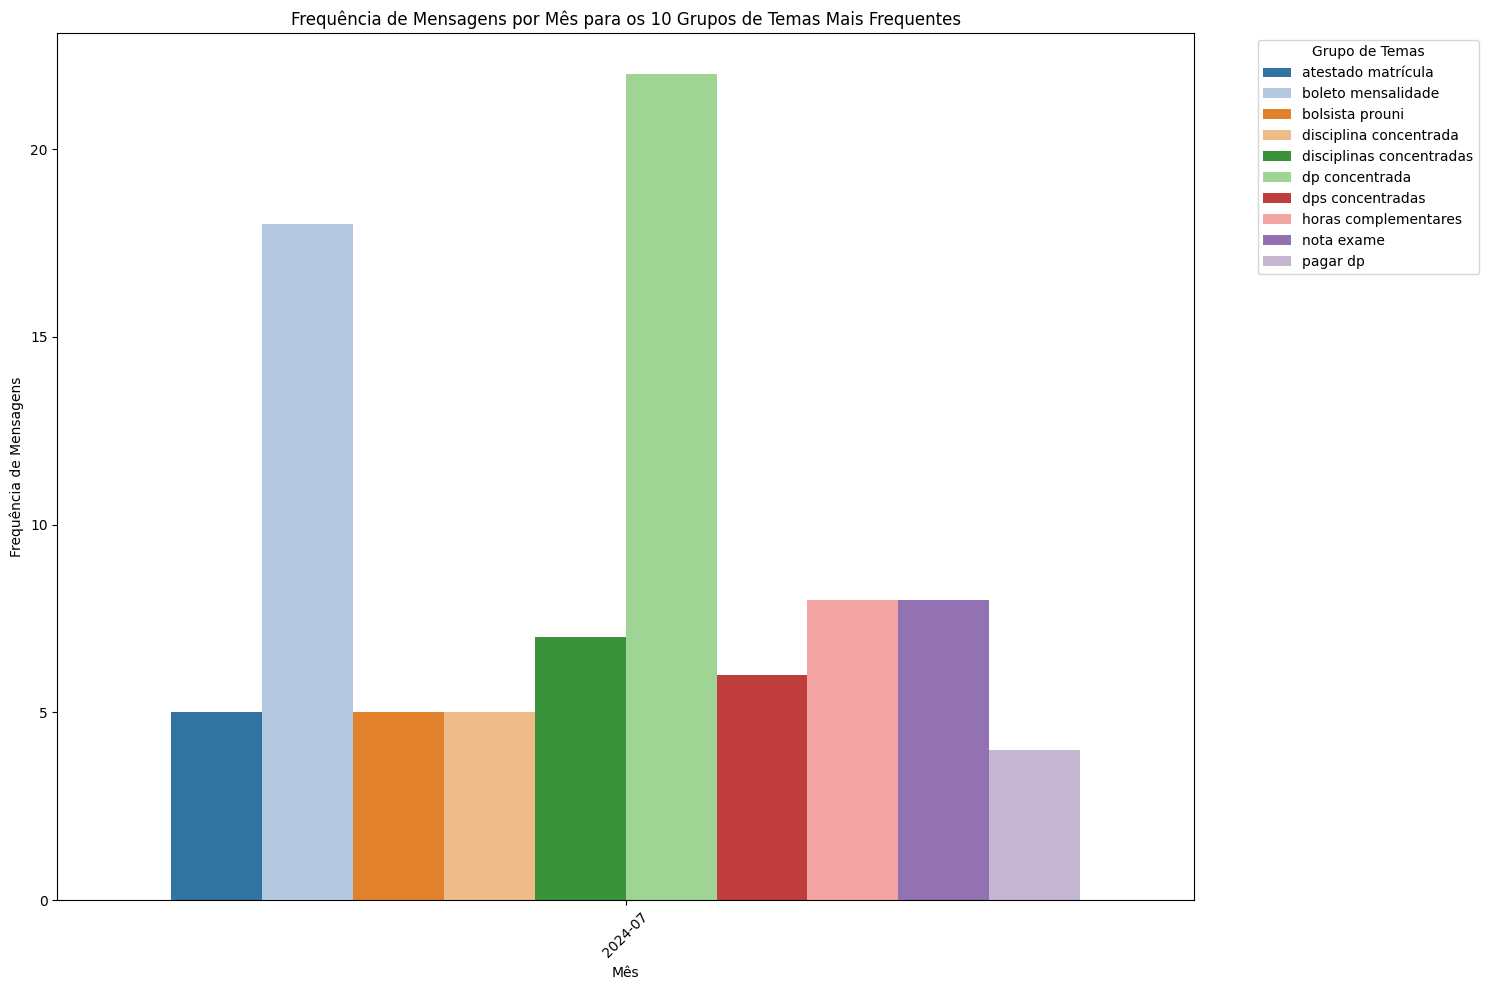

In [ ]:
plt.figure(figsize=(15, 10))
sns.barplot(x='mes_ano', y='Frequencia', hue='Grupo_Tema', data=frequencia_top_10, palette='tab20')
plt.xlabel('Mês')
plt.ylabel('Frequência de Mensagens')
plt.title('Frequência de Mensagens por Mês para os 10 Grupos de Temas Mais Frequentes')
plt.xticks(rotation=45)
plt.legend(title='Grupo de Temas', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

## Analise por dias da semana


In [ ]:
# Conversas['startTime'] = pd.to_datetime(Conversas['startTime'])  # Substitua 'startTime' pelo nome correto da coluna

# # Extrair o dia da semana
# Conversas['dia_semana'] = Conversas['startTime'].dt.day_name()

# # Inicializar um DataFrame para armazenar as frequências por dia da semana
# frequencia_por_dia_semana = pd.DataFrame(columns=['Palavra', 'Frequencia', 'dia_semana'])


In [ ]:
# # Aplicar o mapeamento ao DataFrame de frequências
# frequencia_por_dia_semana['Grupo_Tema'] = frequencia_por_dia_semana['Palavra'].apply(mapear_tema)

# # Reagrupar as frequências por grupo de temas e dia da semana
# frequencia_por_dia_semana['Frequencia'] = pd.to_numeric(frequencia_por_dia_semana['Frequencia'])
# frequencia_agrupada = frequencia_por_dia_semana.groupby(['Grupo_Tema', 'dia_semana'])['Frequencia'].sum().reset_index()

# # Selecionar os 20 grupos de temas mais frequentes
# top_10_temas = frequencia_agrupada.groupby('Grupo_Tema')['Frequencia'].sum().nlargest(10).index

# # Filtrar o DataFrame para esses grupos de temas
# frequencia_top_10 = frequencia_agrupada[frequencia_agrupada['Grupo_Tema'].isin(top_10_temas)]


In [ ]:
# # Ordenar os dias da semana na ordem correta
# dias_ordem = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
# frequencia_por_dia_semana['dia_semana'] = pd.Categorical(frequencia_por_dia_semana['dia_semana'], categories=dias_ordem, ordered=True)
# frequencia_por_dia_semana = frequencia_por_dia_semana.sort_values('dia_semana')

In [ ]:
# # Iterar sobre cada dia da semana
# for dia in Conversas['dia_semana'].unique():
#     # Filtrar as mensagens do dia específico
#     mensagens_dia = Conversas[Conversas['dia_semana'] == dia]['transcriptConsumer_clean']

#     # Vetorizar as mensagens do dia
#     TransformarMensagens_dia = vectorizer.transform(mensagens_dia)

#     # Somar as frequências dos bigramas
#     frequencia_dia = TransformarMensagens_dia.sum(axis=0)

#     # Criar um DataFrame com as frequências
#     dados_frequencia_dia = pd.DataFrame({'Palavra': vocabulario, 'Frequencia': frequencia_dia.flat})
#     dados_frequencia_dia['dia_semana'] = dia

#     # Adicionar ao DataFrame principal
#     frequencia_por_dia_semana = pd.concat([frequencia_por_dia_semana, dados_frequencia_dia], ignore_index=True)

In [ ]:
# # Mapeamento de termos para grupos de temas
# mapeamento_temas = {
#     'bilhete estudante': 'bilhete estudante',
#     'sp trans': 'bilhete estudante',
#     'passe livre': 'bilhete estudante',
#     'passe escolar': 'bilhete estudante',
#     'revalidar bilhete': 'bilhete estudante',
#     'começam aulas': 'inicio aulas',
#     'aulas começam': 'inicio aulas',
#     'historico escolar': 'historico escolar',
#     'histórico escolar': 'historico escolar',
#     'bolsa prouni': 'bolsa prouni',
#     'bolsita prouni': 'bolsa prouni',
#     'boleto mensalidade' : 'boleto mensalidade',
#     'boleto rematricula' : 'boleto mensalidade',
#     'boleto rematrícula' : 'boleto mensalidade',
#     'pagar boleto' : 'boleto mensalidade',
#     'pagar mensalidade' : 'boleto mensalidade',
#     'pagar rematrícula' : 'boleto mensalidade',
#     'rematrícula boleto' : 'boleto mensalidade'
# }

In [ ]:
# # Função para mapear bigramas aos grupos de temas
# def mapear_tema(bigrama):
#     for termo, grupo in mapeamento_temas.items():
#         if termo in bigrama:
#             return grupo
#     return bigrama  # Se não houver mapeamento, retorna o próprio bigrama

In [ ]:
# # Plotar as frequências por dia da semana para os 20 grupos de temas mais frequentes
# plt.figure(figsize=(15, 10))
# sns.barplot(x='dia_semana', y='Frequencia', hue='Grupo_Tema', data=frequencia_top_10, palette='tab20')
# plt.xlabel('Dia da Semana')
# plt.ylabel('Frequência de Mensagens')
# plt.title('Frequência de Mensagens por Dia da Semana para os 10 Grupos de Temas Mais Frequentes')
# plt.xticks(rotation=45)
# plt.legend(title='Grupo de Temas', bbox_to_anchor=(1.05, 1), loc='upper left')
# plt.tight_layout()
# plt.show()

In [ ]:
# # Reagrupar as frequências por grupo de temas e dia da semana
# frequencia_agrupada = frequencia_por_dia_semana.groupby(['Grupo_Tema', 'dia_semana'])['Frequencia'].sum().reset_index()

# # Visualizar a frequência por dia da semana para um grupo de temas específico
# grupo_especifico = 'bilhete estudante'
# frequencia_grupo_especifico = frequencia_agrupada[frequencia_agrupada['Grupo_Tema'] == grupo_especifico]

# plt.figure(figsize=(10, 6))
# sns.barplot(x='dia_semana', y='Frequencia', data=frequencia_grupo_especifico, palette='viridis')
# plt.xlabel('Dia da Semana')
# plt.ylabel('Frequência de Mensagens')
# plt.title(f'Frequência de Mensagens por Dia da Semana (Grupo de Temas: {grupo_especifico})')
# plt.xticks(rotation=45)
# plt.tight_layout()
# plt.show()

## Vizualizar Bigrama


<ipython-input-53-8448c0f95428>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='Frequencia', y='Grupo_Tema', data=top_10_frequencia, palette='viridis')


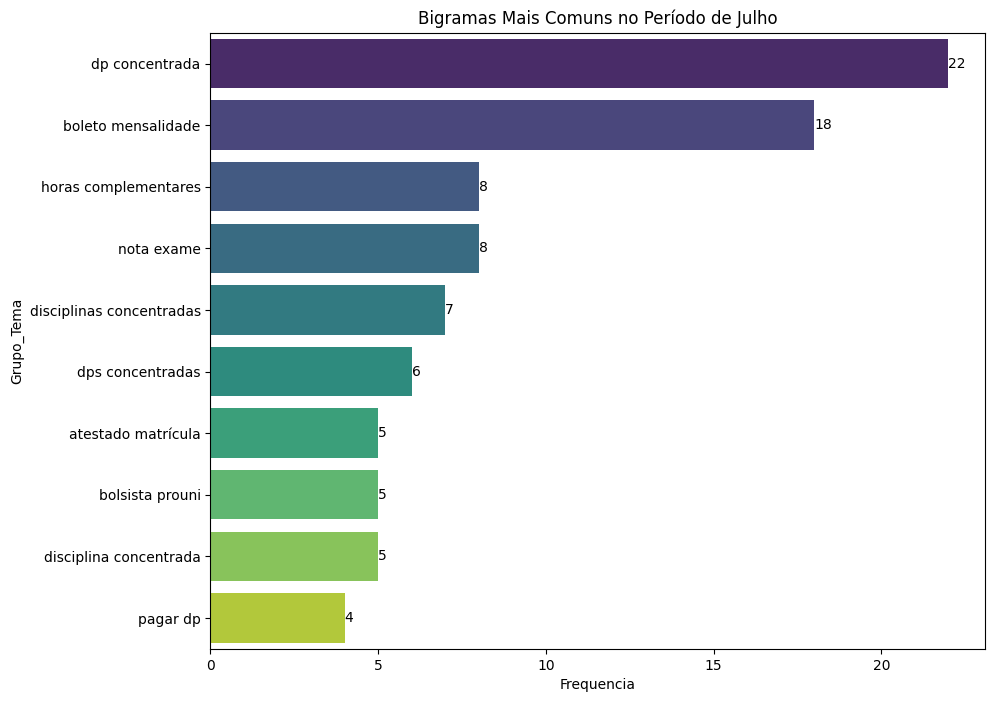

In [ ]:
dados_frequencia['Grupo_Tema'] = dados_frequencia['Palavra'].apply(mapear_tema)

top_10_frequencia = dados_frequencia.groupby('Grupo_Tema')['Frequencia'].sum().nlargest(10).reset_index()

plt.figure(figsize=(10, 8))
ax = sns.barplot(x='Frequencia', y='Grupo_Tema', data=top_10_frequencia, palette='viridis')
plt.title('Bigramas Mais Comuns no Período de Julho')

# Adicionando as contagens de frequência sobre as barras
for i in ax.containers:
    ax.bar_label(i, label_type='edge')

## Desbravamento de temas

In [ ]:
def analisar_bigrams_para_grupo(dados_frequencia, grupo_tema):
    # Filtrar os dados para o grupo de tema específico
    dados_grupo_especifico = dados_frequencia[dados_frequencia['Grupo_Tema'] == grupo_tema]

    # Agrupar as frequências dos bigramas dentro do grupo
    frequencia_bigramas_grupo = dados_grupo_especifico.groupby('Palavra')['Frequencia'].sum().reset_index()

    # Ordenar pelos bigramas mais frequentes
    frequencia_bigramas_grupo = frequencia_bigramas_grupo.sort_values(by='Frequencia', ascending=False)

    # Plotar os bigramas mais comuns dentro do grupo de temas específico
    plt.figure(figsize=(10, 8))
    ax = sns.barplot(x='Frequencia', y='Palavra', data=frequencia_bigramas_grupo.head(10), palette='viridis')
    plt.title(f'Bigramas Mais Comuns em "{grupo_tema}" no Período de Janeiro até Abril')

    # Adicionando as contagens de frequência sobre as barras
    for i in ax.containers:
        ax.bar_label(i, label_type='edge')
    plt.show()

<ipython-input-40-c9d26ef50399>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='Frequencia', y='Palavra', data=frequencia_bigramas_grupo.head(10), palette='viridis')


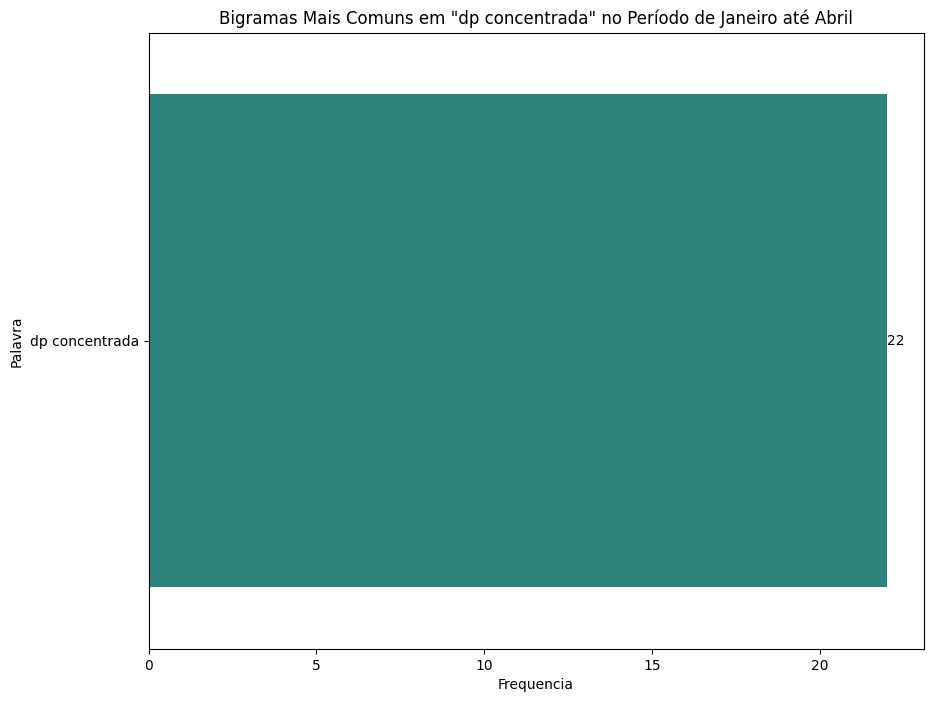

<ipython-input-40-c9d26ef50399>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='Frequencia', y='Palavra', data=frequencia_bigramas_grupo.head(10), palette='viridis')


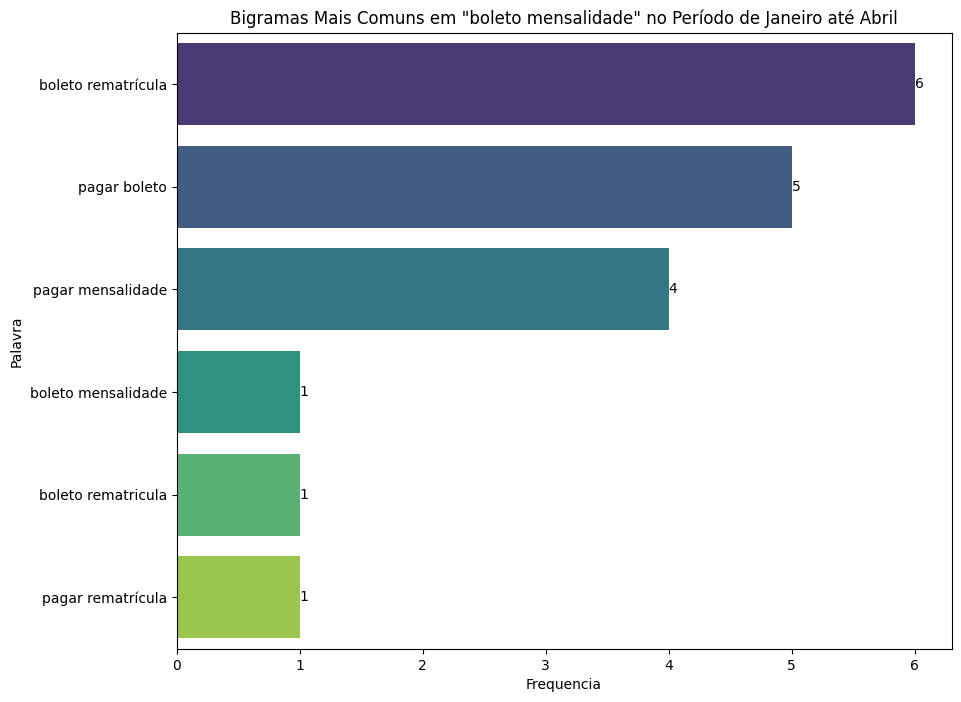

<ipython-input-40-c9d26ef50399>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='Frequencia', y='Palavra', data=frequencia_bigramas_grupo.head(10), palette='viridis')


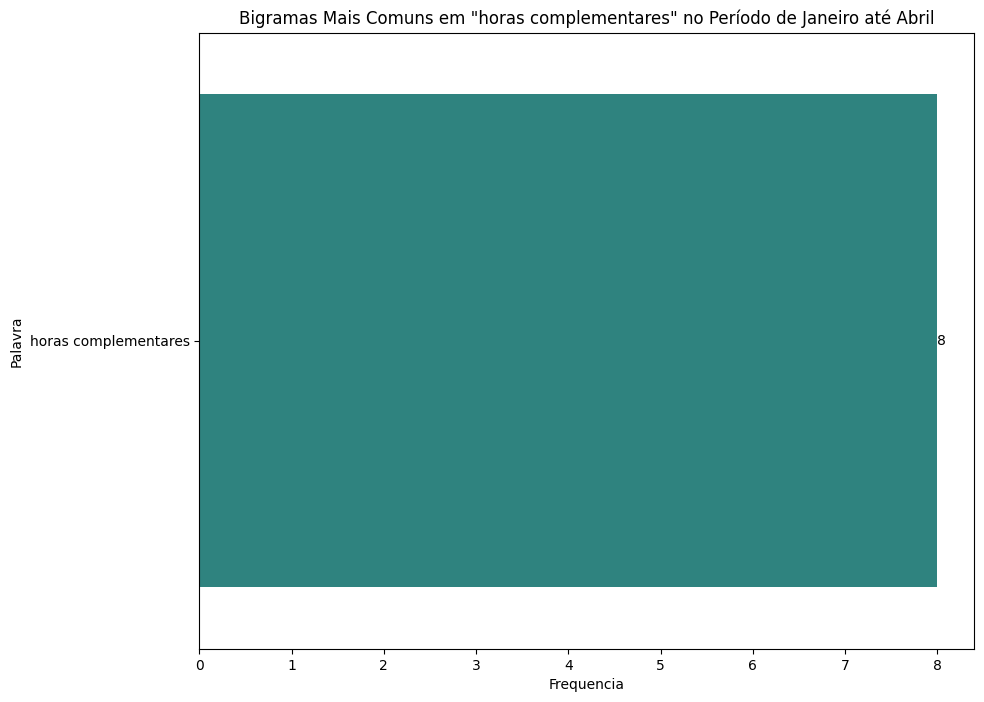

<ipython-input-40-c9d26ef50399>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='Frequencia', y='Palavra', data=frequencia_bigramas_grupo.head(10), palette='viridis')


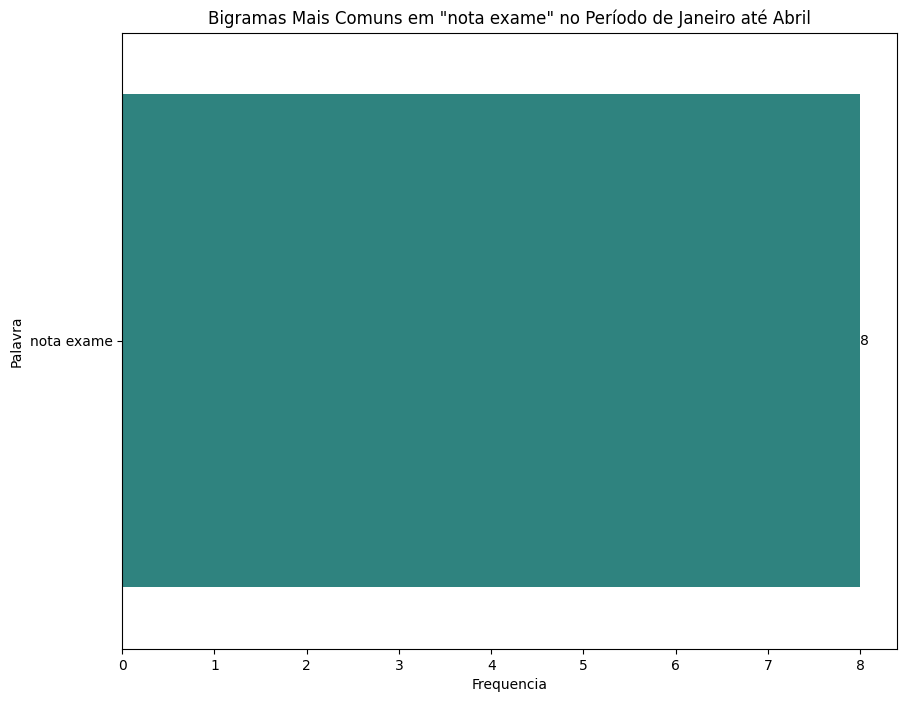

<ipython-input-40-c9d26ef50399>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='Frequencia', y='Palavra', data=frequencia_bigramas_grupo.head(10), palette='viridis')


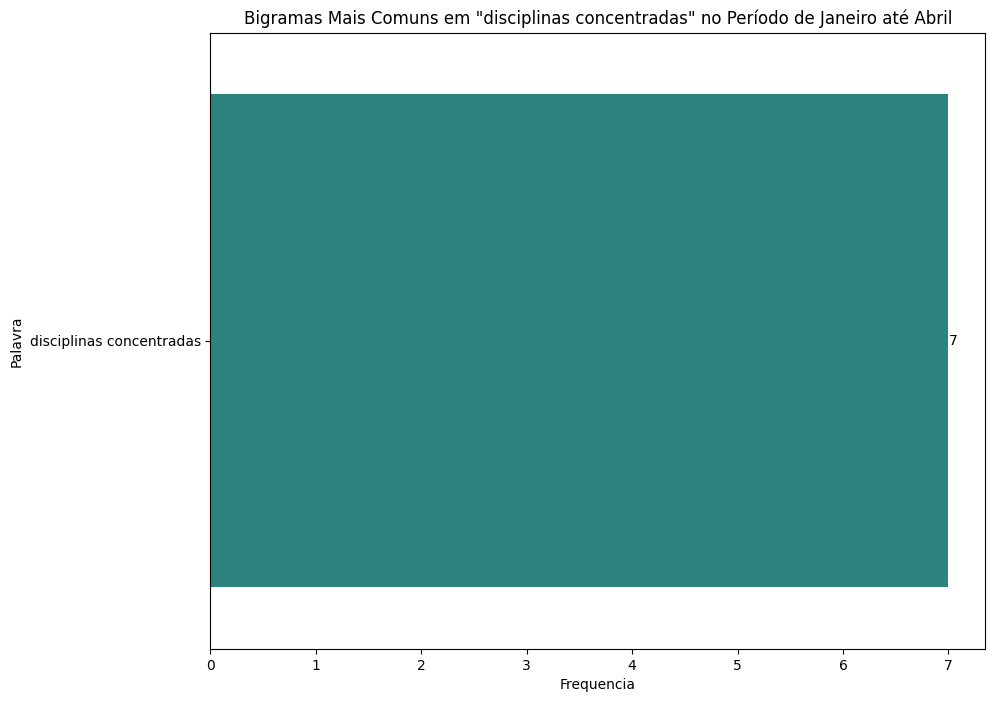

<ipython-input-40-c9d26ef50399>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='Frequencia', y='Palavra', data=frequencia_bigramas_grupo.head(10), palette='viridis')


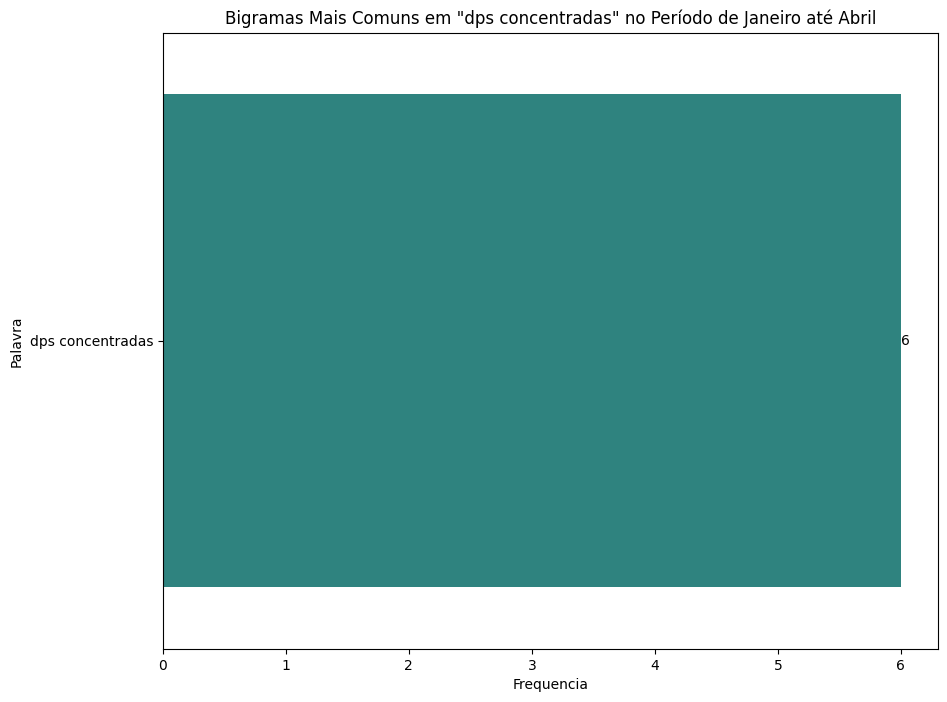

<ipython-input-40-c9d26ef50399>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='Frequencia', y='Palavra', data=frequencia_bigramas_grupo.head(10), palette='viridis')


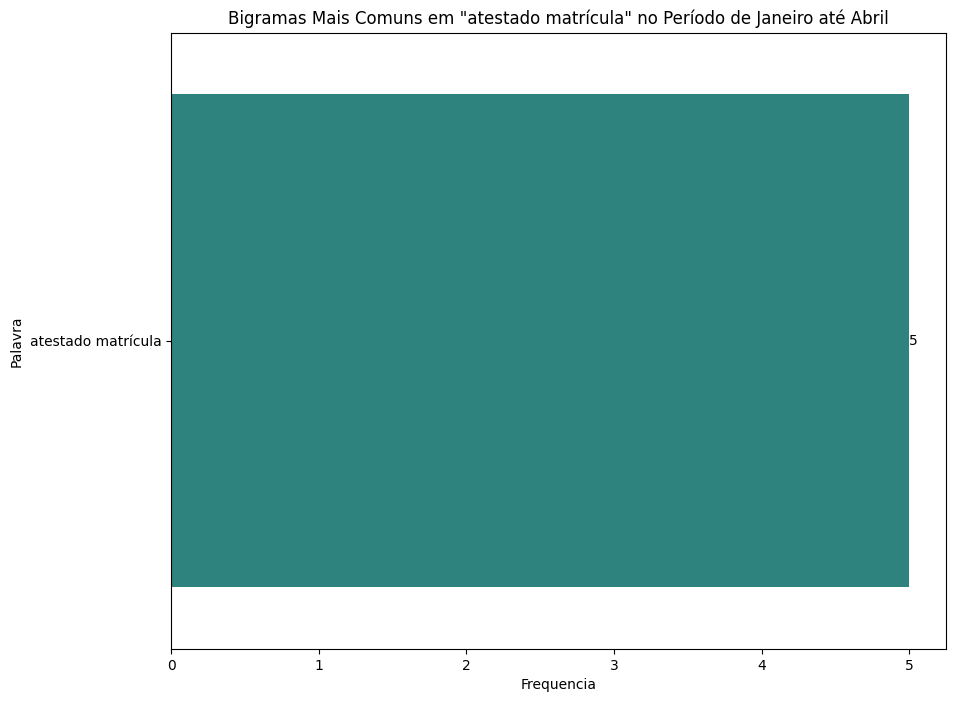

<ipython-input-40-c9d26ef50399>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='Frequencia', y='Palavra', data=frequencia_bigramas_grupo.head(10), palette='viridis')


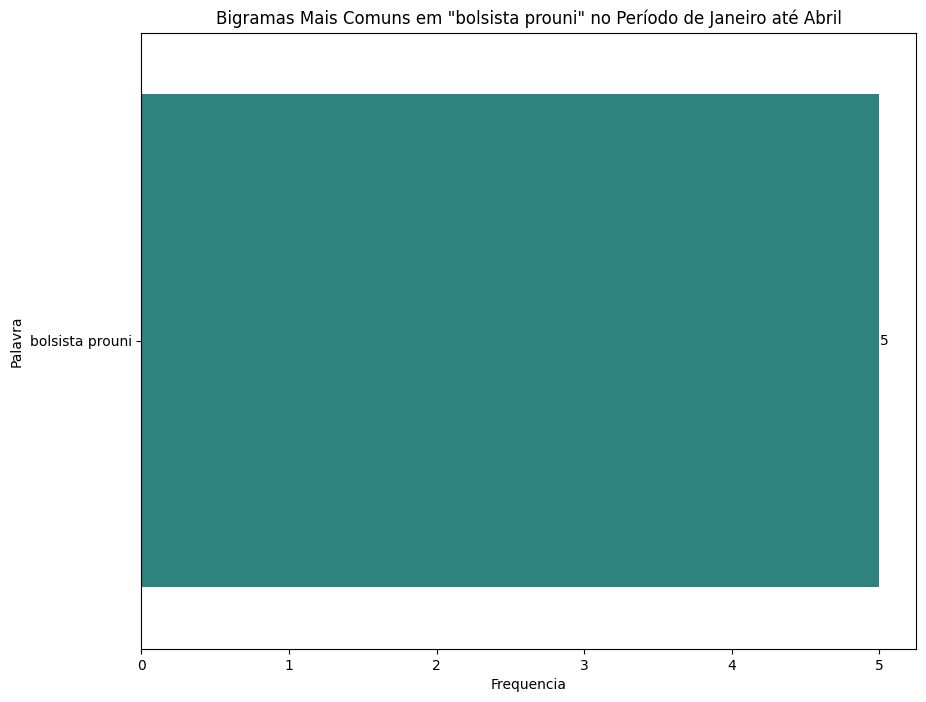

<ipython-input-40-c9d26ef50399>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='Frequencia', y='Palavra', data=frequencia_bigramas_grupo.head(10), palette='viridis')


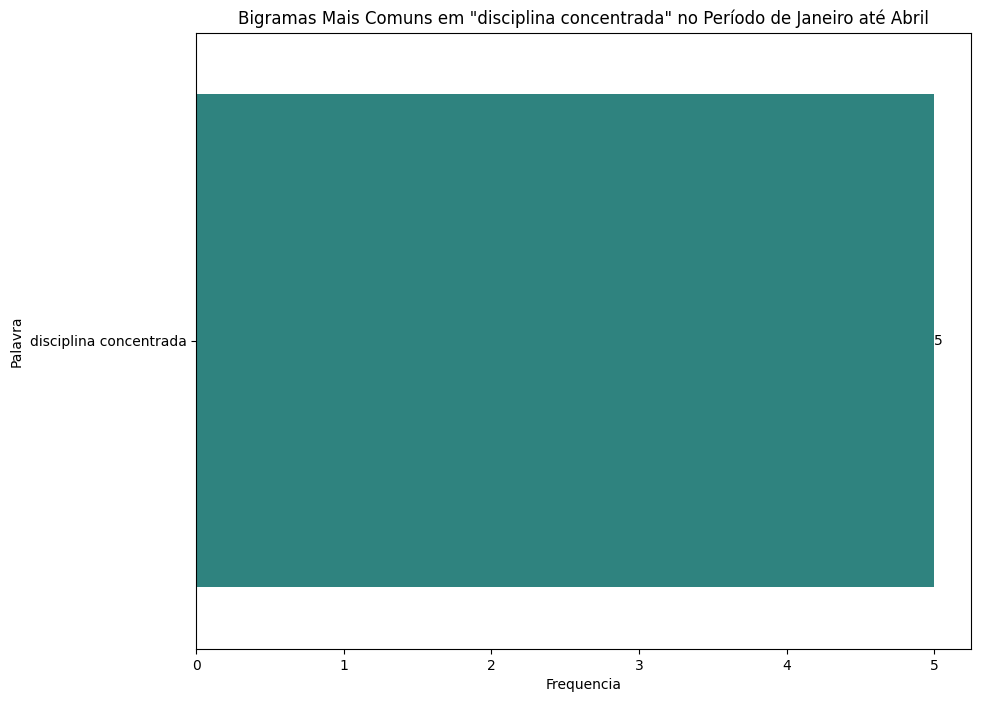

<ipython-input-40-c9d26ef50399>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='Frequencia', y='Palavra', data=frequencia_bigramas_grupo.head(10), palette='viridis')


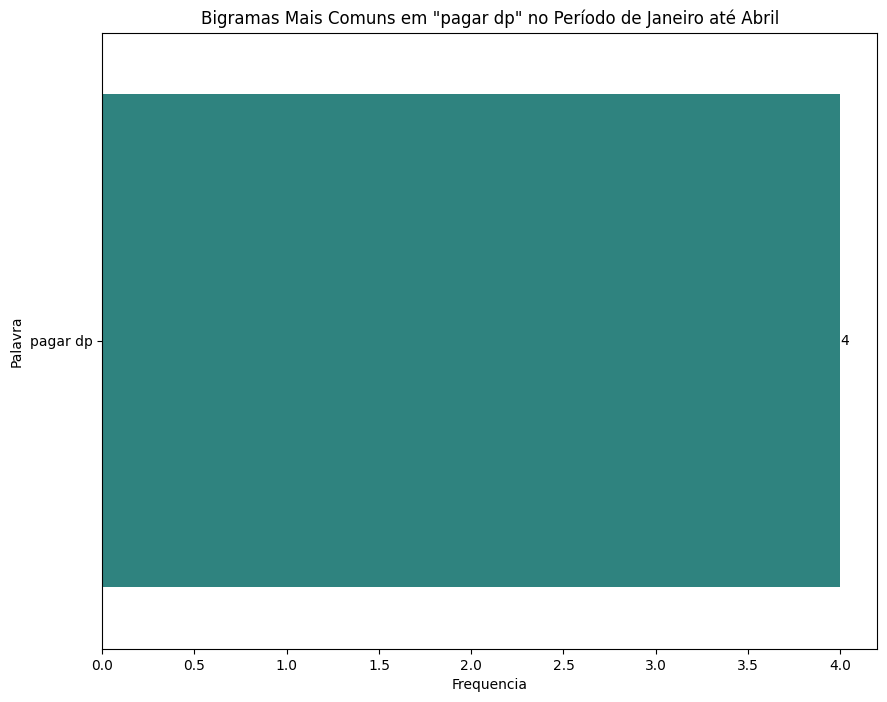

In [ ]:
# Supondo que já temos os dados_frequencia e top_10_frequencia definidos anteriormente
top_10_grupos_temas = top_10_frequencia['Grupo_Tema']

# Aplicar a função para cada grupo de temas nos top 10
for grupo_tema in top_10_grupos_temas:
    analisar_bigrams_para_grupo(dados_frequencia, grupo_tema)

## Streamlit

# variações temporais no volume de mensagens

## Selecionar apenas as colunas relevantes

In [ ]:
# df_fila_unidade = dadosFilaUnidade[['DATA', 'CONVERSAS INICIADAS']]
# df_relatorio_agente = dadosAgentes[['DATA', 'NÚMERO DE CONVERSAS AGENTE']]

NameError: name 'dadosFilaUnidade' is not defined

## Agrupar os dados por dia e calcular o total de conversas iniciadas e concluídas em cada dia

In [ ]:
# df_conversas_iniciadas = df_fila_unidade.groupby(pd.Grouper(key='DATA', freq='D')).sum()
# df_conversas_concluidas = df_relatorio_agente.groupby(pd.Grouper(key='DATA', freq='D')).sum()

## Visualizar os dados

In [ ]:
# dadosFilaUnidade['DATA'] = pd.to_datetime(dadosFilaUnidade['DATA'])
# dadosFilaUnidade.set_index('DATA', inplace=True)

In [ ]:
# print(dadosFilaUnidade.dtypes)

In [ ]:
# dadosAgentes['DATA'] = pd.to_datetime(dadosAgentes['DATA'])
# dadosAgentes.set_index('DATA', inplace=True)

In [ ]:
# # Supondo que 'df_conversas_iniciadas' e 'df_conversas_concluidas' sejam seus DataFrames originais

# # Crie um índice de datas que abrange o intervalo completo desejado
# data_inicio = min(df_conversas_iniciadas.index.min(), df_conversas_concluidas.index.min())
# data_fim = max(df_conversas_iniciadas.index.max(), df_conversas_concluidas.index.max())
# todas_as_datas = pd.date_range(start=data_inicio, end=data_fim, freq='D')

# # Reindexe os DataFrames para garantir que todas as datas estejam presentes
# df_conversas_iniciadas = df_conversas_iniciadas.reindex(todas_as_datas, fill_value=0)
# df_conversas_concluidas = df_conversas_concluidas.reindex(todas_as_datas, fill_value=0)

# # Crie os traces para o gráfico, incluindo os textos
# trace_conversas_iniciadas = go.Scatter(
#     x=df_conversas_iniciadas.index,
#     y=df_conversas_iniciadas['CONVERSAS INICIADAS'],
#     mode='lines+markers+text',
#     name='Conversas Iniciadas',
#     text=df_conversas_iniciadas['CONVERSAS INICIADAS'],
#     textposition='top center'
# )

# trace_conversas_concluidas = go.Scatter(
#     x=df_conversas_concluidas.index,
#     y=df_conversas_concluidas['NÚMERO DE CONVERSAS AGENTE'],
#     mode='lines+markers+text',
#     name='Conversas Concluídas',
#     text=df_conversas_concluidas['NÚMERO DE CONVERSAS AGENTE'],
#     textposition='top center'
# )

# # Defina o layout do gráfico
# layout = go.Layout(
#     title='Número de Conversas Iniciadas e Concluídas ao Longo do Tempo',
#     xaxis=dict(title='Data'),
#     yaxis=dict(title='Número de Conversas'),
#     legend=dict(x=0, y=1, traceorder='normal')
# )

# # Crie a figura e exiba o gráfico
# fig = go.Figure(data=[trace_conversas_iniciadas, trace_conversas_concluidas], layout=layout)

# pio.show(fig)


# Explorar padrões de horário na fila de conversa

### Preparação dos Dados

In [ ]:
# Converter startTime para datetime
Conversas['startTime'] = pd.to_datetime(Conversas['startTime'])

In [ ]:
# Extrair hora do dia e dia da semana
Conversas['Hora'] = Conversas['startTime'].dt.hour
Conversas['Dia_Semana'] = Conversas['startTime'].dt.dayofweek

In [ ]:
# Mapear os números dos dias da semana para nomes
dias_semana = {0: 'Segunda-feira', 1: 'Terça-feira', 2: 'Quarta-feira', 3: 'Quinta-feira', 4: 'Sexta-feira', 5: 'Sábado', 6: 'Domingo'}
Conversas['Dia_Semana'] = Conversas['Dia_Semana'].map(dias_semana)

In [ ]:
Conversas['Dia_Semana']

0        Terça-feira
1        Terça-feira
2        Terça-feira
3        Terça-feira
4        Terça-feira
           ...      
172    Segunda-feira
173    Segunda-feira
174    Segunda-feira
175    Segunda-feira
176    Segunda-feira
Name: Dia_Semana, Length: 177, dtype: object

### Agrupar e Agregar os Dados

In [ ]:
# Agrupar por hora do dia e contar o número de conversas
conversas_por_hora = Conversas.groupby('Hora').size().reset_index(name='Quantidade')
conversas_por_hora = conversas_por_hora.sort_values(by='Hora')

In [ ]:
# Agrupar por dia da semana e contar o número de conversas
conversas_por_dia = Conversas.groupby('Dia_Semana').size().reset_index(name='Quantidade')
conversas_por_dia['Dia_Semana'] = pd.Categorical(conversas_por_dia['Dia_Semana'], categories=['Segunda-feira', 'Terça-feira', 'Quarta-feira', 'Quinta-feira', 'Sexta-feira', 'Sábado', 'Domingo'], ordered=True)
conversas_por_dia = conversas_por_dia.sort_values(by='Dia_Semana')

In [ ]:
print(conversas_por_hora)
print(conversas_por_dia)

    Hora  Quantidade
0      9           1
1     11           2
2     12          41
3     13          37
4     14          25
5     15          16
6     16           9
7     17          11
8     18          10
9     19           5
10    20           6
11    21           8
12    22           3
13    23           3
      Dia_Semana  Quantidade
0  Segunda-feira         127
1    Terça-feira          50


### Visualização dos Padrões

<ipython-input-51-b4d7775743fb>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Hora', y='Quantidade', data=conversas_por_hora, palette='viridis')


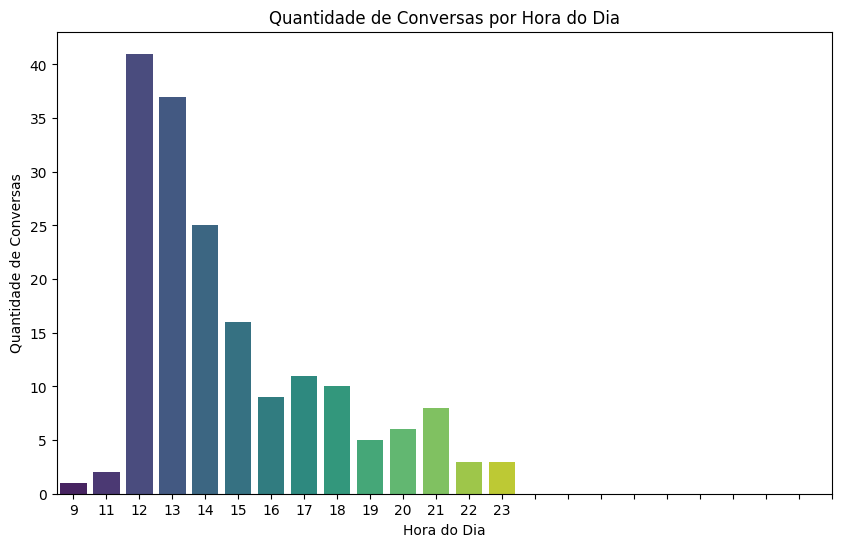

In [ ]:
# Visualização das conversas por hora do dia
plt.figure(figsize=(10, 6))
sns.barplot(x='Hora', y='Quantidade', data=conversas_por_hora, palette='viridis')
plt.title('Quantidade de Conversas por Hora do Dia')
plt.xlabel('Hora do Dia')
plt.ylabel('Quantidade de Conversas')
plt.xticks(range(0, 24))
plt.show()


<ipython-input-52-da33bbad85de>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Dia_Semana', y='Quantidade', data=conversas_por_dia, palette='viridis')


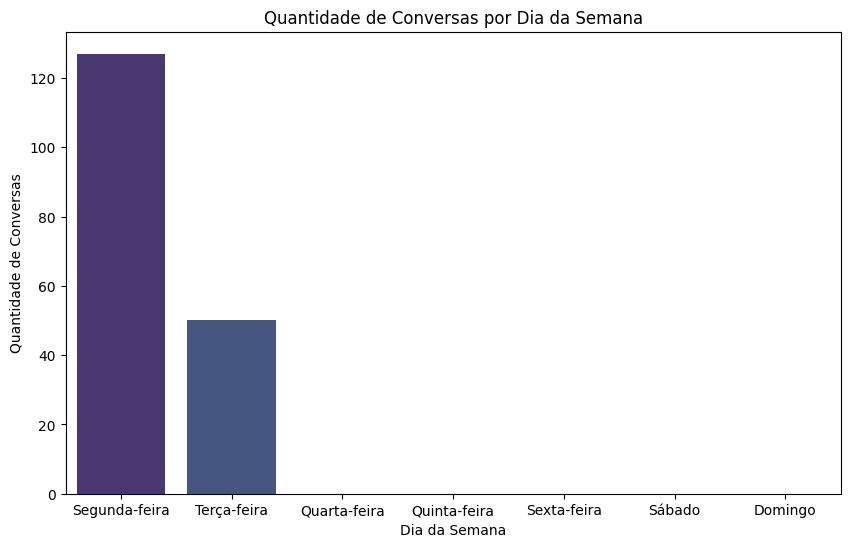

In [ ]:
# Visualização das conversas por dia da semana
plt.figure(figsize=(10, 6))
sns.barplot(x='Dia_Semana', y='Quantidade', data=conversas_por_dia, palette='viridis')
plt.title('Quantidade de Conversas por Dia da Semana')
plt.xlabel('Dia da Semana')
plt.ylabel('Quantidade de Conversas')
plt.show()